In [31]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

# K-Means

In [32]:
df = pd.read_csv(r"C:\Users\aozde\OneDrive\Documents\MachineLearning\gozetimsiz_ogrenme\gozetimsiz_ogrenme\USArrests.csv").copy()
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [33]:
 # Unnamed  is not variable  /is observation

In [34]:
#  get all observations in zeroth index
df.index = df.iloc[:,0]

In [35]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [36]:
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
Unnamed: 0                                             
Alabama        Alabama    13.2      236        58  21.2
Alaska          Alaska    10.0      263        48  44.5
Arizona        Arizona     8.1      294        80  31.0
Arkansas      Arkansas     8.8      190        50  19.5
California  California     9.0      276        91  40.6

In [37]:
df = df.iloc[:,1:5]

In [38]:
df.head()

Murder  Assault  UrbanPop  Rape
Unnamed: 0                                 
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [39]:
#del  df.index.name

In [40]:
df.head()

Murder  Assault  UrbanPop  Rape
Unnamed: 0                                 
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [41]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [43]:
df.describe().T

count     mean        std   min      25%     50%      75%    max
Murder     50.0    7.788   4.355510   0.8    4.075    7.25   11.250   17.4
Assault    50.0  170.760  83.337661  45.0  109.000  159.00  249.000  337.0
UrbanPop   50.0   65.540  14.474763  32.0   54.500   66.00   77.750   91.0
Rape       50.0   21.232   9.366385   7.3   15.075   20.10   26.175   46.0

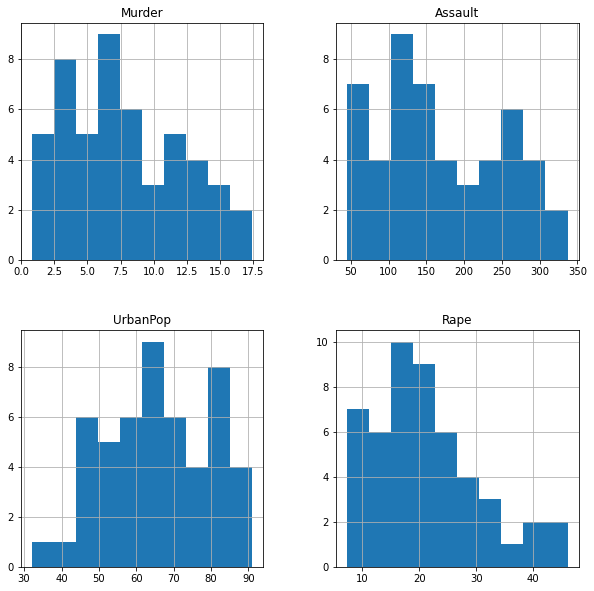

In [44]:
df.hist(figsize = (10,10));

# K-MEANS Model ve Visualization

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [ ]:
?kmeans

In [46]:
k_fit = kmeans.fit(df)

In [47]:
k_fit.n_clusters

4

In [48]:
k_fit.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [49]:
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2])

In [ ]:
#visualization

In [54]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [55]:
clusters = k_fit.labels_

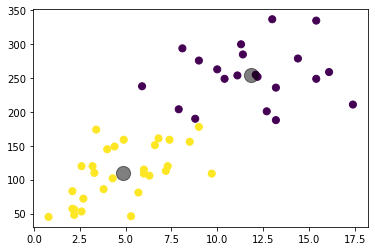

In [56]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5);

In [57]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#!pip install --upgrade matplotlib
#import mpl_toolkits

In [58]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_
centers = kmeans.cluster_centers_

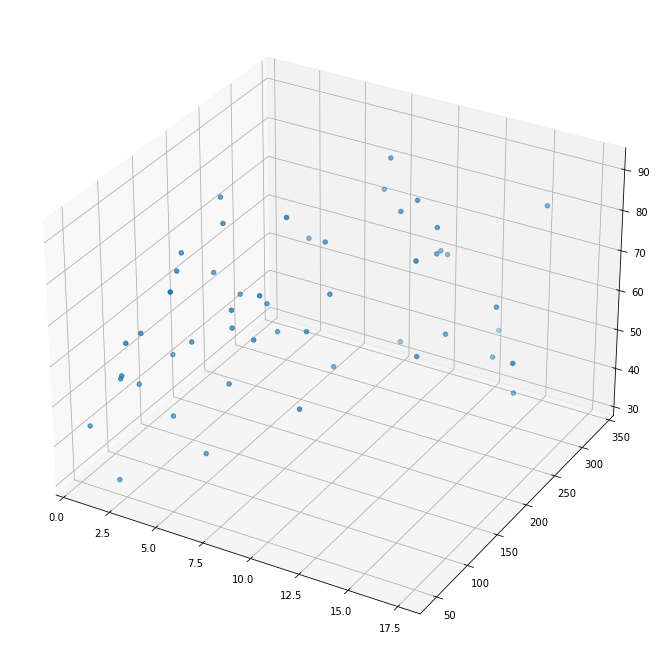

In [59]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

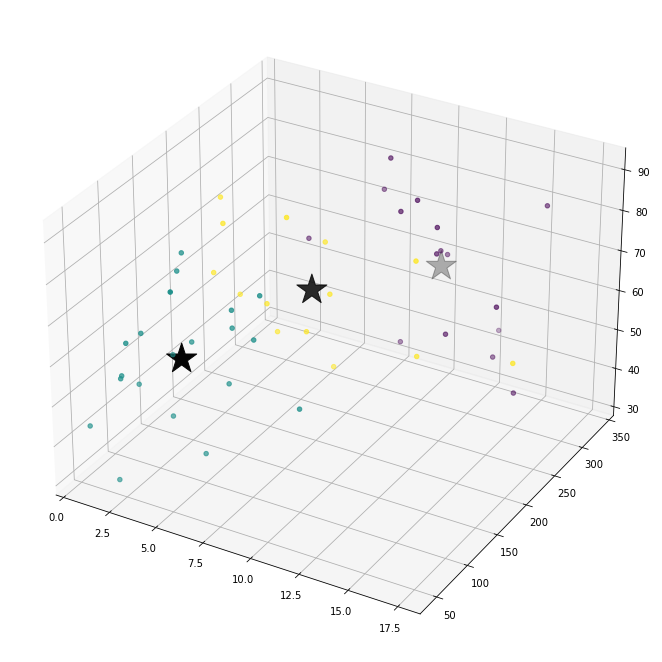

In [60]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=clusters)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [ ]:
#clusters ve observation units

In [63]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [64]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

States  Clusters
0      Alabama         0
1       Alaska         0
2      Arizona         0
3     Arkansas         2
4   California         0
5     Colorado         2
6  Connecticut         1
7     Delaware         0
8      Florida         0
9      Georgia         2

In [65]:
df["cluster_no"] = clusters

In [66]:
df.head()

Murder  Assault  UrbanPop  Rape  cluster_no
Unnamed: 0                                             
Alabama       13.2      236        58  21.2           0
Alaska        10.0      263        48  44.5           0
Arizona        8.1      294        80  31.0           0
Arkansas       8.8      190        50  19.5           2
California     9.0      276        91  40.6           0

# Determination of the optimum number of clusters

In [82]:
!pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


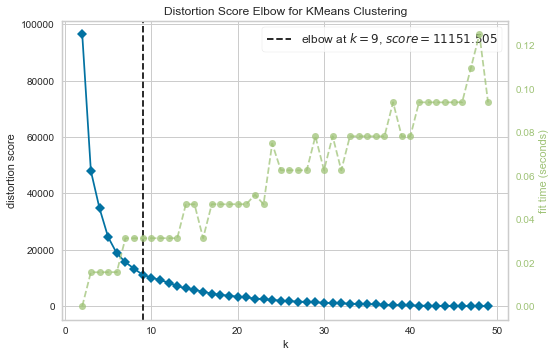

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [84]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [85]:
pd.DataFrame({"States" : df.index, "Clusters": clusters})[0:10]

States  Clusters
0      Alabama         0
1       Alaska         0
2      Arizona         0
3     Arkansas         2
4   California         0
5     Colorado         2
6  Connecticut         1
7     Delaware         0
8      Florida         0
9      Georgia         2

# Hierarchical Clustering

In [86]:
df = pd.read_csv(r"C:\Users\aozde\OneDrive\Documents\MachineLearning\gozetimsiz_ogrenme\gozetimsiz_ogrenme\USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

Murder  Assault  UrbanPop  Rape
Unnamed: 0                                 
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [87]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [88]:
#dir(hc_complete)

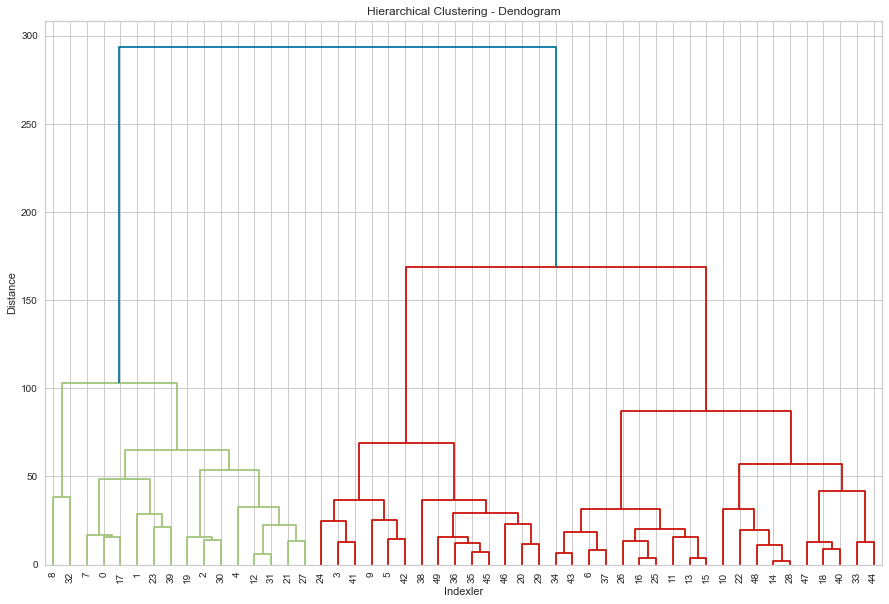

In [89]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

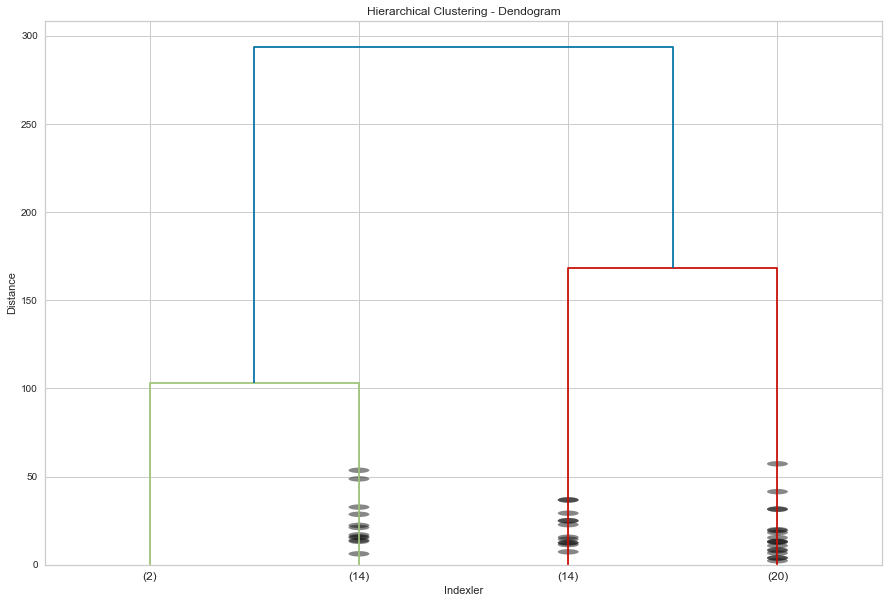

In [90]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Distance')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

# Optimum Cluster Number

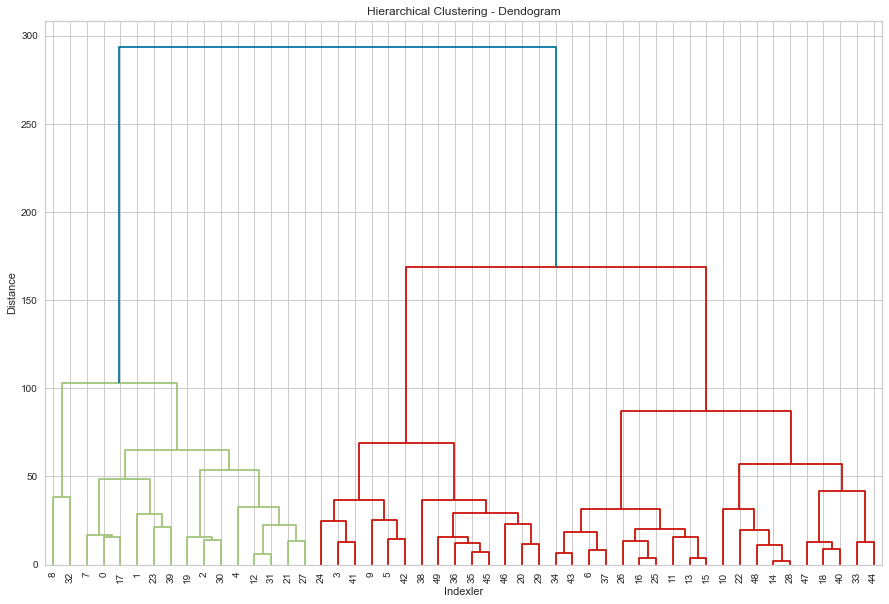

In [91]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Distance')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [ ]:
#?den

In [ ]:
#?dendrogram

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [93]:
pd.DataFrame({"States" : df.index, "Clusters": cluster.fit_predict(df)})[0:10]

States  Clusters
0      Alabama         0
1       Alaska         0
2      Arizona         0
3     Arkansas         2
4   California         0
5     Colorado         2
6  Connecticut         3
7     Delaware         0
8      Florida         0
9      Georgia         2

In [94]:
df["cluster_no"] = cluster.fit_predict(df)

In [95]:
df.head()

Murder  Assault  UrbanPop  Rape  cluster_no
Unnamed: 0                                             
Alabama       13.2      236        58  21.2           0
Alaska        10.0      263        48  44.5           0
Arizona        8.1      294        80  31.0           0
Arkansas       8.8      190        50  19.5           2
California     9.0      276        91  40.6           0

# PCA

In [96]:
df = pd.read_csv(r"C:\Users\aozde\OneDrive\Documents\MachineLearning\gozetimsiz_ogrenme\gozetimsiz_ogrenme\USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

Murder  Assault  UrbanPop  Rape
Unnamed: 0                                 
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [97]:
from warnings import filterwarnings
filterwarnings('ignore')

In [98]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [100]:
component_df = pd.DataFrame(data = pca_fit, 
                          columns = ["first_component","second_component","third_component"])

In [101]:
component_df.head()

first_component  second_component  third_component
0         0.985566          1.133392        -0.444269
1         1.950138          1.073213         2.040003
2         1.763164         -0.745957         0.054781
3        -0.141420          1.119797         0.114574
4         2.523980         -1.542934         0.598557

In [102]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [103]:
pca = PCA().fit(df)

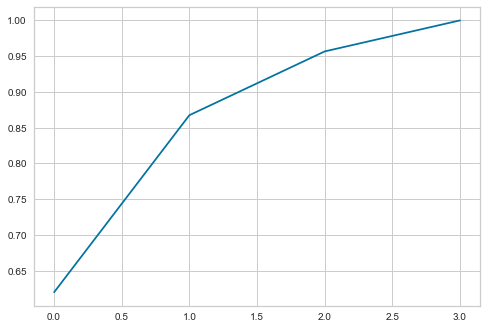

In [105]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));